Perform hierarchical clustering (single linkage) and k-means clustering on the TopUniversities data using Scikit-Learn. Complete both clustering tasks in one program file.

a. Draw the dendrogram for hierarchical clustering. 

b. Perform hierarchical clustering (with single linkage) and k-means clustering with 2 clusters. Compare the results of the two algorithms by displaying the cluster labels for each record on a table. 

c.Let the range of the number of clusters be k = 2, 3, …, 15. Find the best k from this range for hierarchical clustering based on the silhouette score. Find the best k for k-means clustering based on the silhouette score and inertia (SSE) score.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Mounted at /content/drive


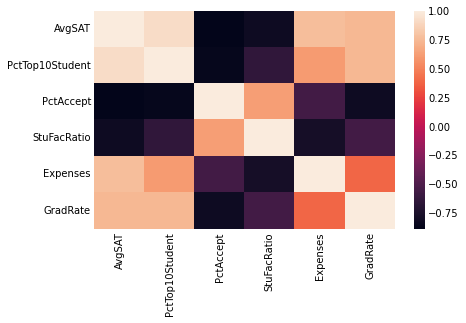

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv('/content/drive/MyDrive/DataMining/Files/TopUniversities.csv')

#see the corr matrix
cm=df.corr()
sns.heatmap(cm)

Not much Correlation present in the dataset

In [3]:
df.head

<bound method NDFrame.head of         University  AvgSAT  PctTop10Student  PctAccept  StuFacRatio  Expenses  GradRate
0          Harvard   14.00               91         14           11    39.525        97
1        Princeton   13.75               91         14            8    30.220        95
2             Yale   13.75               95         19           11    43.514        96
3         Stanford   13.60               90         20           12    36.450        93
4              MIT   13.80               94         30           10    34.870        91
5             Duke   13.15               90         30           12    31.585        95
6          CalTech   14.15              100         25            6    63.575        81
7        Dartmouth   13.40               89         23           10    32.162        95
8            Brown   13.10               89         22           13    22.704        94
9     JohnsHopkins   13.05               75         44            7    58.691        87
10

University         0
AvgSAT             0
PctTop10Student    0
PctAccept          0
StuFacRatio        0
Expenses           0
GradRate           0
dtype: int64

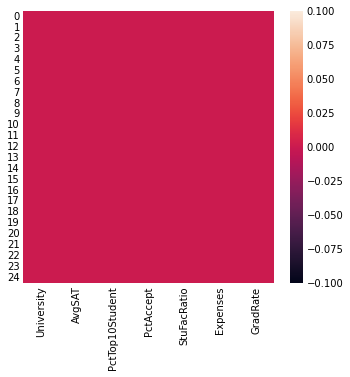

In [4]:
#Hitmap to check the null or drop columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull()) ##to visualize the missing values
df.isnull().sum()

No null values present in the dataset

In [5]:
df

,University,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate
0,Harvard,14.00,91,14,11,39.525,97
1,Princeton,13.75,91,14,8,30.220,95
2,Yale,13.75,95,19,11,43.514,96
3,Stanford,13.60,90,20,12,36.450,93
4,MIT,13.80,94,30,10,34.870,91
5,Duke,13.15,90,30,12,31.585,95
6,CalTech,14.15,100,25,6,63.575,81
7,Dartmouth,13.40,89,23,10,32.162,95
8,Brown,13.10,89,22,13,22.704,94
9,JohnsHopkins,13.05,75,44,7,58.691,87


Hierarchical Clustering

In [6]:
#dropping the university name column
df = df.drop (['University'], axis='columns')
df

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate
0,14.00,91,14,11,39.525,97
1,13.75,91,14,8,30.220,95
2,13.75,95,19,11,43.514,96
3,13.60,90,20,12,36.450,93
4,13.80,94,30,10,34.870,91
5,13.15,90,30,12,31.585,95
6,14.15,100,25,6,63.575,81
7,13.40,89,23,10,32.162,95
8,13.10,89,22,13,22.704,94
9,13.05,75,44,7,58.691,87


In [7]:
# Normalize numeric features and encode categorical features to dummies (by if-else)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numary = scaler.fit_transform(df[['AvgSAT','PctTop10Student','PctAccept','StuFacRatio','Expenses','GradRate']])
normdf = pd.DataFrame(data=numary, columns=['AvgSAT','PctTop10Student','PctAccept','StuFacRatio','Expenses','GradRate'])
normdf

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate
0,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
1,0.902439,0.875000,0.000000,0.105263,0.392120,0.933333
2,0.902439,0.930556,0.065789,0.263158,0.634397,0.966667
3,0.865854,0.861111,0.078947,0.315789,0.505659,0.866667
4,0.914634,0.916667,0.210526,0.210526,0.476864,0.800000
5,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
6,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
7,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
8,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


a. Draw the dendrogram for hierarchical clustering.

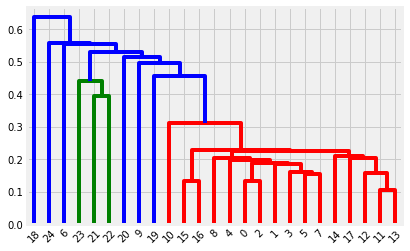

In [8]:
# Draw dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(normdf, method='single'))

Doing some additional exploration as discussed in class

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

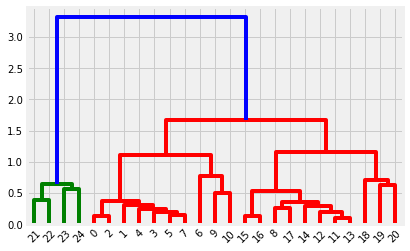

In [10]:
#Creating a new dendogram using 'Ward' method
dendrogram1 = sch.dendrogram(sch.linkage(normdf, method='ward'))

We can see how this method has created different clusters compared to the previous single linkage method. Here we can clearly see 3 broad clusters however potentially they have joined and can be treated as two clusters

b. Perform hierarchical clustering (with single linkage) and k-means clustering with 2 clusters. Compare the results of the two algorithms by displaying the cluster labels for each record on a table.

In [14]:
# Single linkage hierarchical (agglomerative) clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
pred = agg.fit_predict(normdf)
normdf['Cluster'] = pred
normdf

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate,Cluster
0,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
1,0.902439,0.875000,0.000000,0.105263,0.392120,0.933333,0
2,0.902439,0.930556,0.065789,0.263158,0.634397,0.966667,0
3,0.865854,0.861111,0.078947,0.315789,0.505659,0.866667,0
4,0.914634,0.916667,0.210526,0.210526,0.476864,0.800000,0
5,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
6,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
7,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
8,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


In [15]:
df['Cluster'] = pred
df

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate,Cluster
0,14.00,91,14,11,39.525,97,0
1,13.75,91,14,8,30.220,95,0
2,13.75,95,19,11,43.514,96,0
3,13.60,90,20,12,36.450,93,0
4,13.80,94,30,10,34.870,91,0
5,13.15,90,30,12,31.585,95,0
6,14.15,100,25,6,63.575,81,0
7,13.40,89,23,10,32.162,95,0
8,13.10,89,22,13,22.704,94,0
9,13.05,75,44,7,58.691,87,0


c.Let the range of the number of clusters be k = 2, 3, …, 15. Find the best k from this range for hierarchical clustering based on the silhouette score. Find the best k for k-means clustering based on the silhouette score and inertia (SSE) score.

In [16]:
# Find the best number of clusters (k) based on silhouette score
from sklearn.metrics import silhouette_score
agg_per_k = [AgglomerativeClustering(n_clusters=k, linkage='single').fit(normdf)
             for k in range(2, 15)]
silhouette_scores = [silhouette_score(normdf, model.labels_)
for model in agg_per_k[1:]]
silhouette_scores

[0.3298692358328648,
 0.14103419528584418,
 0.3153455351816817,
 0.21503619932634635,
 0.2179131096401342,
 0.237703475188227,
 0.23996672027224084,
 0.2256135863801685,
 0.12955286995839427,
 0.16082507160418927,
 0.20848368075223134,
 0.16126376721319005]

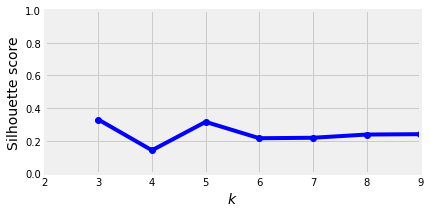

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(range(3, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 9, 0, 1])
plt.show()
# silhouette_score is the largest when k=2

Silhouette_score is the largest when k=3. This means we can do 3 clusters for this example

K Means Clustering with 2 clusters

In [18]:
# k-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
pred = kmeans.fit_predict(normdf)
normdf['Cluster'] = pred
normdf

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate,Cluster
0,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
1,0.902439,0.875000,0.000000,0.105263,0.392120,0.933333,0
2,0.902439,0.930556,0.065789,0.263158,0.634397,0.966667,0
3,0.865854,0.861111,0.078947,0.315789,0.505659,0.866667,0
4,0.914634,0.916667,0.210526,0.210526,0.476864,0.800000,0
5,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
6,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
7,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
8,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


In [19]:
kmeans.cluster_centers_

array([[0.75481386, 0.80263158, 0.21260388, 0.28254848, 0.42109867,
        0.79122807, 0.        ],
       [0.26666667, 0.26388889, 0.70833333, 0.57894737, 0.0853031 ,
        0.23333333, 0.16666667]])

In [20]:
df['Cluster'] = pred
df

,AvgSAT,PctTop10Student,PctAccept,StuFacRatio,Expenses,GradRate,Cluster
0,14.00,91,14,11,39.525,97,0
1,13.75,91,14,8,30.220,95,0
2,13.75,95,19,11,43.514,96,0
3,13.60,90,20,12,36.450,93,0
4,13.80,94,30,10,34.870,91,0
5,13.15,90,30,12,31.585,95,0
6,14.15,100,25,6,63.575,81,0
7,13.40,89,23,10,32.162,95,0
8,13.10,89,22,13,22.704,94,0
9,13.05,75,44,7,58.691,87,0


Let the range of the number of clusters be k = 2, 3, …, 15. Find the best k from this range for hierarchical clustering based on the silhouette score. Find the best k for k-means clustering based on the silhouette score and inertia (SSE) score.

In [21]:
# Find the best k based on silhouette score
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=1).fit(normdf)
                for k in range(2, 15)]
silhouette_scores = [silhouette_score(normdf, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores

[0.36224461353311166,
 0.38824797046932874,
 0.3312585950243881,
 0.33064779436187053,
 0.29478237159067766,
 0.2791879807333731,
 0.27377996211572,
 0.251587051791595,
 0.21987109324508988,
 0.20551795935301753,
 0.21058410197863467,
 0.1695178912597066]

silhouette_scores has improved slightly in K-Means clustering compared to hierarchical clustering 

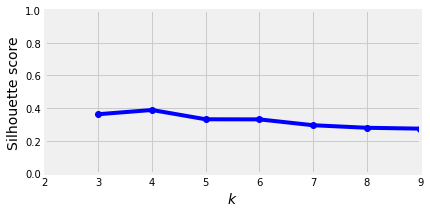

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(range(3, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 9, 0, 1])
plt.show()

Silhouette_score is the largest when k=4

In [41]:
# Find the best k based on inertia (SSE) score
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[4.123452442397178,
 3.033332821193251,
 2.3728787761000536,
 1.7285680842090172,
 1.445647696186281,
 1.213425909585292,
 1.0291133191249702,
 0.874105522476116,
 0.7191461832968294,
 0.5399459160057575,
 0.46210574681607375,
 0.35493170150747966,
 0.27747308171260643]

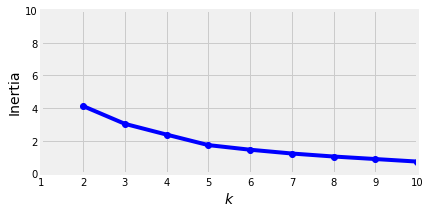

In [42]:
plt.figure(figsize=(6, 3))
plt.plot(range(2, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 0, 10])
plt.show()
# elbow point occurs at k=3

Doing some additional visual work here

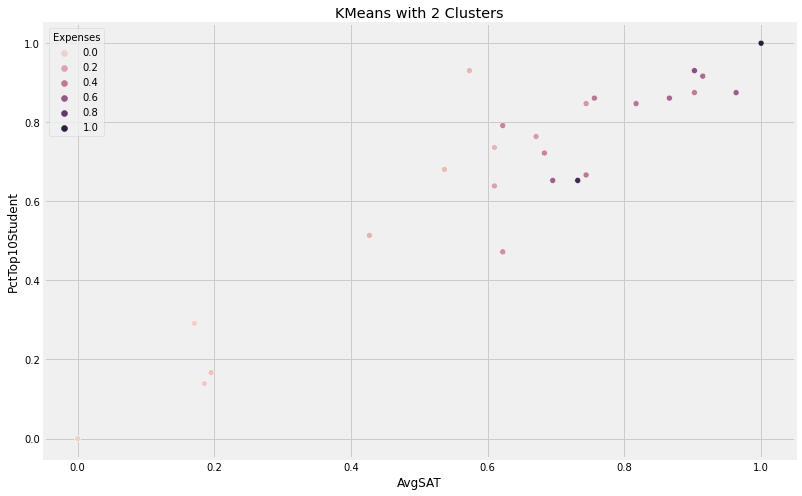

In [45]:
# 2 cluster plot
km3 = KMeans(n_clusters=2).fit(normdf)

normdf['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(normdf['AvgSAT'], normdf['PctTop10Student'], hue=normdf['Expenses'], 
                )
plt.title('KMeans with 2 Clusters')
plt.show()

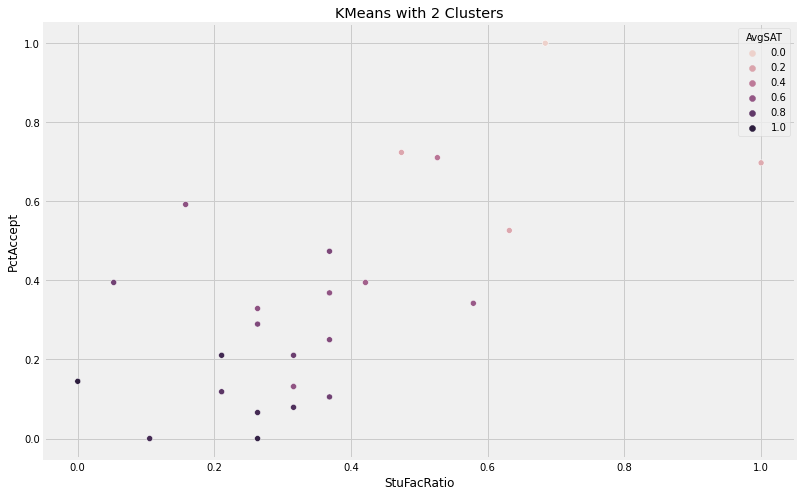

In [46]:
# 2 cluster plot
km3 = KMeans(n_clusters=2).fit(normdf)

normdf['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(normdf['StuFacRatio'], normdf['PctAccept'], hue=normdf['AvgSAT'], 
                )
plt.title('KMeans with 2 Clusters')
plt.show()

Above illustration shows how clusters changed based on the parameters and similarly we can visually analyse different clusters.